##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# 과대적합과 과소적합

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/overfit_and_underfit"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서 보기</a>   </td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/keras/overfit_and_underfit.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab에서 실행</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/keras/overfit_and_underfit.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서 소스 보기</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/tutorials/keras/overfit_and_underfit.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드</a></td>
</table>

지금까지 그랬듯이 이 예제의 코드도 `tf.keras` API를 사용합니다. 텐서플로 [케라스 가이드](https://www.tensorflow.org/guide/keras)에서 `tf.keras` API에 대해 더 많은 정보를 얻을 수 있습니다.

[텍스트 분류](text_classification_with_hub.ipynb) 및 [연료 효율성 예측](regression.ipynb)이라는 두 가지 이전의 예에서 검증 데이터에 대한 모델의 정확도가 여러 에포크 동안 훈련 후에 정점에 도달한 다음 정체되거나 감소하기 시작할 수 있습니다.

즉, 여기서의 모델은 훈련 데이터에 *과대적합됩니다*. 과대적합에 대처하는 방법을 배우는 것은 중요합니다. *훈련 세트*에서 높은 정확도를 달성하는 것은 종종 가능하지만 여러분이 정말로 원하는 것은 *테스트 세트*(또는 이전에 본 적 없는 데이터)에서 잘 일반화되는 모델을 개발하는 것입니다.

과대적합의 반대는 *과소적합*(underfitting)입니다. 과소적합은 테스트 세트의 성능이 향상될 여지가 아직 있을 때 일어납니다. 발생하는 원인은 여러가지입니다. 모델이 너무 단순하거나, 규제가 너무 많거나, 그냥 단순히 충분히 오래 훈련하지 않는 경우입니다. 즉 네트워크가 훈련 세트에서 적절한 패턴을 학습하지 못했다는 뜻입니다.

너무 오래 훈련하면 모델이 과대적합을 시작하며 테스트 데이터에 일반화되지 않는 훈련 데이터로부터 패턴을 학습합니다. 이러한 경우 균형을 잘 잡아야 합니다. 아래에서 탐색할 적절한 epoch 수로 훈련하는 방법을 이해하는 것은 유용한 기술입니다.

과적합을 방지하기 위한 최상의 솔루션은 더 완전한 훈련 데이터를 사용하는 것입니다. 데이터세트는 모델이 처리할 것으로 예상되는 전체 입력 범위를 포괄해야 합니다. 추가 데이터는 새롭고 흥미로운 사례를 다루는 경우에만 유용할 수 있습니다.

더 완전한 데이터로 훈련된 모델은 자연스럽게 더 잘 일반화됩니다. 이것이 더 이상 불가능할 경우, 차선책은 정규화와 같은 기술을 사용하는 것입니다. 이는 모델이 저장할 수 있는 정보의 양과 유형에 제약을 가합니다. 네트워크가 적은 수의 패턴만 기억할 수 있다면 최적화 프로세스는 일반화 가능성이 더 높은 가장 두드러진 패턴에 중점을 두도록 합니다.

이 노트북에서는 몇 가지 일반적인 정규화 기술을 살펴보고 이를 분류 모델 개선에 사용합니다.

## 설정

시작하기 전에 필요한 패키지를 가져옵니다.

In [3]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)

2.9.0


In [5]:
!pip install git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

  Cloning https://github.com/tensorflow/docs to /private/var/folders/gj/skwjrjts6mdfv78jdlhh__5r0000gn/T/pip-req-build-1cae41fy
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /private/var/folders/gj/skwjrjts6mdfv78jdlhh__5r0000gn/T/pip-req-build-1cae41fy
  Resolved https://github.com/tensorflow/docs to commit 9b5b8b055e29d006b94b5dfc906d774ee4094bae
  Preparing metadata (setup.py) ... done


In [6]:
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile


In [7]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

## 힉스(Higgs) 데이터세트

이 튜토리얼의 목표는 입자 물리학을 수행하는 것이 아니므로 데이터 세트의 세부 사항에 집착하지 마세요. 여기에는 각각 28개의 특성과 이진 클래스 레이블이 있는 11,000,000개의 예제가 포함되어 있습니다.

In [8]:
gz = tf.keras.utils.get_file('HIGGS.csv.gz', 'http://mlphysics.ics.uci.edu/data/higgs/HIGGS.csv.gz')

In [9]:
FEATURES = 28

`tf.data.experimental.CsvDataset` 클래스는 중간 압축 해제 단계 없이 gzip 파일에서 직접 csv 레코드를 읽는 데 사용할 수 있습니다.

In [10]:
ds = tf.data.experimental.CsvDataset(gz,[float(),]*(FEATURES+1), compression_type="GZIP")

Metal device set to: Apple M2


2023-03-04 21:47:49.491444: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-04 21:47:49.491628: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


해당 csv 판독기 클래스는 각 레코드에 대한 스칼라 목록을 반환합니다. 다음 함수는 해당 스칼라 목록을 (feature_vector, label) 쌍으로 다시 압축합니다.

In [11]:
def pack_row(*row):
  label = row[0]
  features = tf.stack(row[1:],1)
  return features, label

TensorFlow는 대규모 데이터 배치에서 작업할 때 가장 효율적입니다.

따라서 각 행을 개별적으로 다시 압축하는 대신 10,000개 예제의 배치를 취하고 각 배치에 `pack_row` 함수를 적용한 다음 배치를 다시 개별 레코드로 분할하는 새로운 `tf.data.Dataset`를 만듭니다.

In [12]:
packed_ds = ds.batch(10000).map(pack_row).unbatch()

이 새로운 `packed_ds`의 일부 레코드를 살펴봅니다.

특성이 완벽하게 정규화되지는 않았지만 이 튜토리얼에서는 이것으로 충분합니다.

2023-03-04 21:47:49.617999: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


tf.Tensor(
[ 0.8692932  -0.6350818   0.22569026  0.32747006 -0.6899932   0.75420225
 -0.24857314 -1.0920639   0.          1.3749921  -0.6536742   0.9303491
  1.1074361   1.1389043  -1.5781983  -1.0469854   0.          0.65792954
 -0.01045457 -0.04576717  3.1019614   1.35376     0.9795631   0.97807616
  0.92000484  0.72165745  0.98875093  0.87667835], shape=(28,), dtype=float32)


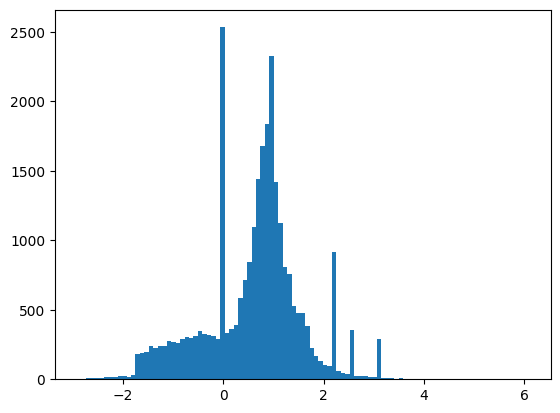

In [13]:
for features,label in packed_ds.batch(1000).take(1):
  print(features[0])
  plt.hist(features.numpy().flatten(), bins = 101)

이 튜토리얼을 비교적 짧게 유지하기 위해 처음 1,000개의 샘플만 검증에 사용하고 다음 10,000개는 훈련에 사용합니다.

In [14]:
N_VALIDATION = int(1e3)
N_TRAIN = int(1e4)
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 500
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

`Dataset.skip` 및 `Dataset.take` 메서드를 사용하면 이를 쉽게 수행할 수 있습니다.

동시에 `Dataset.cache` 메서드를 사용하여 로더가 각 epoch에서 파일의 데이터를 다시 읽을 필요가 없도록 합니다.

In [15]:
validate_ds = packed_ds.take(N_VALIDATION).cache()
train_ds = packed_ds.skip(N_VALIDATION).take(N_TRAIN).cache()

In [16]:
train_ds

<CacheDataset element_spec=(TensorSpec(shape=(28,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

이러한 데이터세트는 개별 예제를 반환합니다. `Dataset.batch` 메서드를 사용하여 훈련에 적합한 크기의 배치를 생성합니다. 또한 배치를 처리하기 전에 훈련 세트에 대해 `Dataset.shuffle` 및 `Dataset.repeat`를 사용하는 것도 잊지 않도록 합니다.

In [17]:
validate_ds = validate_ds.batch(BATCH_SIZE)
train_ds = train_ds.shuffle(BUFFER_SIZE).repeat().batch(BATCH_SIZE)

## 과대적합 예제

과적합을 방지하는 가장 간단한 방법은 작은 모델, 즉 학습 가능한 매개변수 수가 적은 모델(레이어 수와 레이어당 단위 수에 의해 결정됨)로 시작하는 것입니다. 딥 러닝에서 모델의 학습 가능한 매개변수 수를 종종 모델의 "용량"이라고 합니다.

직관적으로 생각할 때 더 많은 매개변수를 가진 모델이 더 많은 "기억 용량"을 가지므로 훈련 샘플과 대상 간에 완벽한 사전과 같은 매핑, 일반화 능력이 없는 매핑을 쉽게 학습할 수 있지만 이전에 보지 못한 데이터에서 예측할 때는 이것이 쓸모가 없습니다.

항상 명심할 점! 딥 러닝 모델은 훈련 데이터에 피팅이 잘 되는 경향이 있지만 실제 문제는 피팅이 아닌 일반화입니다.

반면에 네트워크에 기억 리소스가 제한되어 있으면 매핑을 쉽게 학습할 수 없습니다. 손실을 최소화하려면 예측력이 더 높은 압축된 표현을 학습해야 합니다. 동시에 모델을 너무 작게 만들면 훈련 데이터에 피팅하기가  어렵습니다. "용량이 너무 많음"과 "용량이 충분하지 않음" 사이에 균형이 존재합니다.

불행히도 모델의 올바른 크기나 아키텍처(레이어 수 또는 각 레이어의 올바른 크기 측면에서)를 결정하는 마법과 같은 공식은 없습니다. 일련의 다른 아키텍처를 사용하여 실험해 보아야 합니다.

적절한 모델 크기를 찾으려면 비교적 적은 수의 레이어와 매개변수로 시작한 다음 유효성 검사 손실에 대한 이득 감소가 나타날 때까지 레이어의 크기를 늘리거나 새 레이어를 추가하는 것이 가장 좋습니다.

조밀하게 연결된 레이어(`tf.keras.layers.Dense`)만 사용하는 간단한 기준 모델로 시작한 다음 더 큰 모델을 만들고, 모델들을 서로 비교합니다.

### 기준 모델 만들기

훈련하는 동안 학습률을 점진적으로 낮추면 많은 모델이 더 잘 훈련됩니다. 시간 경과에 따른 학습률을 줄이려면 `tf.keras.optimizers.schedules`를 사용하세요.

In [18]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

위의 코드는 1,000 epoch에서 학습률을 기본 학습률의 1/2로, 2,000 epoch에서는 1/3로 쌍곡선 방식으로 줄이도록 `tf.keras.optimizers.schedules.InverseTimeDecay`를 설정합니다.

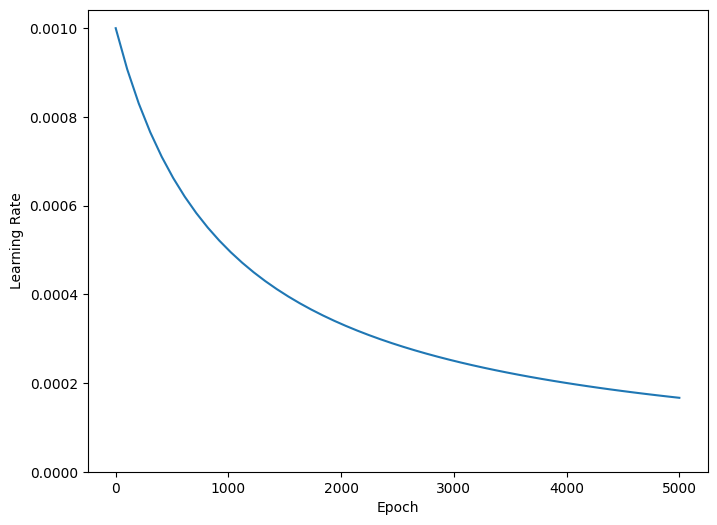

In [19]:
step = np.linspace(0,100000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')


이 튜토리얼의 각 모델은 동일한 훈련 구성을 사용합니다. 따라서 콜백 목록부터 시작하여 재사용 가능한 방식으로 설정하세요.

이 튜토리얼의 훈련은 다수의 짧은 epoch 동안 실행됩니다. 로깅 노이즈를 줄이기 위해 각 epoch에 대해 단순히 `.`을 인쇄하고 100개의 epoch마다 전체 메트릭을 인쇄하는 `tfdocs.EpochDots`를 사용합니다.

다음으로, 길고 불필요한 훈련 시간을 줄이기 위해 `tf.keras.callbacks.EarlyStopping`을 포함합니다. 이 콜백은 `val_loss`가 아니라 `val_binary_crossentropy`를 모니터링하도록 설정되어 있습니다. 이 차이는 나중에 중요합니다.

`callbacks.TensorBoard`를 사용하여 훈련에 대한 TensorBoard 로그를 생성합니다.


In [20]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

마찬가지로 각 모델은 동일한 `Model.compile` 및 `Model.fit` 설정을 사용합니다.

In [21]:
def compile_and_fit(model, name, optimizer=None, max_epochs=10000):
  if optimizer is None:
    optimizer = get_optimizer()
  model.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=[
                  tf.keras.losses.BinaryCrossentropy(
                      from_logits=True, name='binary_crossentropy'),
                  'accuracy'])

  model.summary()

  history = model.fit(
    train_ds,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs=max_epochs,
    validation_data=validate_ds,
    callbacks=get_callbacks(name),
    verbose=0)
  return history

### 미소 모델

모델 훈련으로 시작합니다.

In [22]:
tiny_model = tf.keras.Sequential([
    layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(1)
])

In [23]:
size_histories = {}

In [24]:
size_histories['Tiny'] = compile_and_fit(tiny_model, 'sizes/Tiny')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                464       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


2023-03-04 21:53:05.882669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-04 21:53:31.022377: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 10000
2023-03-04 21:53:31.022394: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 10000
2023-03-04 21:54:02.424209: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 9001 of 10000
2023-03-04 21:54:02.424226: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 9002 of 10000
2023-03-04 21:54:02.424234: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 9003 of 10000
2023-03-04 21:54:02.425042: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle bu


Epoch: 0, accuracy:0.5138,  binary_crossentropy:0.7802,  loss:0.7802,  val_accuracy:0.5370,  val_binary_crossentropy:0.7351,  val_loss:0.7351,  
....................................................................................................
Epoch: 100, accuracy:0.5923,  binary_crossentropy:0.6273,  loss:0.6273,  val_accuracy:0.5800,  val_binary_crossentropy:0.6258,  val_loss:0.6258,  
....................................................................................................
Epoch: 200, accuracy:0.6176,  binary_crossentropy:0.6138,  loss:0.6138,  val_accuracy:0.5990,  val_binary_crossentropy:0.6131,  val_loss:0.6131,  
....................................................................................................
Epoch: 300, accuracy:0.6435,  binary_crossentropy:0.6040,  loss:0.6040,  val_accuracy:0.6260,  val_binary_crossentropy:0.6039,  val_loss:0.6039,  
....................................................................................................
Epoch: 40

이제 모델이 어떻게 작동했는지 확인합니다.

(0.5, 0.7)

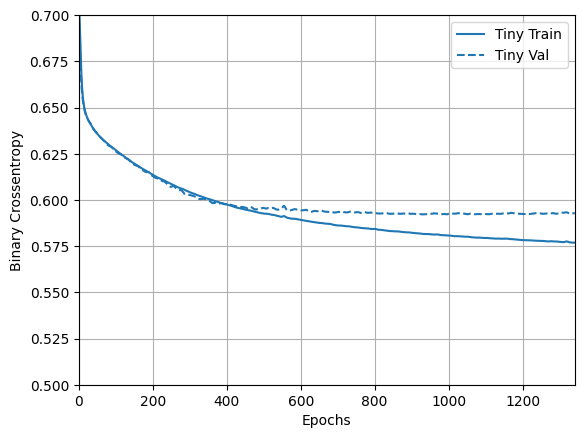

In [25]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)
plotter.plot(size_histories)
plt.ylim([0.5, 0.7])

### 작은 모델

작은 모델의 성능을 능가할 수 있는지 확인하기 위해 일부 큰 모델을 점진적으로 훈련합니다.

각각 16개 단위가 있는 두 개의 숨겨진 레이어를 사용해 봅니다.

In [26]:
small_model = tf.keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(16, activation='elu'),
    layers.Dense(1)
])

In [27]:
size_histories['Small'] = compile_and_fit(small_model, 'sizes/Small')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                464       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________


2023-03-04 21:58:34.696029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch: 0, accuracy:0.4909,  binary_crossentropy:0.7356,  loss:0.7356,  val_accuracy:0.4960,  val_binary_crossentropy:0.7010,  val_loss:0.7010,  
.

2023-03-04 21:58:34.993221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


...................................................................................................
Epoch: 100, accuracy:0.6270,  binary_crossentropy:0.6071,  loss:0.6071,  val_accuracy:0.6060,  val_binary_crossentropy:0.6102,  val_loss:0.6102,  
....................................................................................................
Epoch: 200, accuracy:0.6696,  binary_crossentropy:0.5827,  loss:0.5827,  val_accuracy:0.6550,  val_binary_crossentropy:0.5904,  val_loss:0.5904,  
....................................................................................................
Epoch: 300, accuracy:0.6835,  binary_crossentropy:0.5723,  loss:0.5723,  val_accuracy:0.6340,  val_binary_crossentropy:0.5953,  val_loss:0.5953,  
....................................................................................................
Epoch: 400, accuracy:0.6895,  binary_crossentropy:0.5654,  loss:0.5654,  val_accuracy:0.6630,  val_binary_crossentropy:0.5910,  val_loss:0.5910,  
.........

### 작은 모델 만들기

이제 각각 64개의 단위가 있는 3개의 숨겨진 레이어를 시도하겠습니다.

In [28]:
medium_model = tf.keras.Sequential([
    layers.Dense(64, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(64, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(1)
])

같은 데이터를 사용해 이 모델을 훈련합니다:

In [29]:
size_histories['Medium']  = compile_and_fit(medium_model, "sizes/Medium")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1856      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________


2023-03-04 21:59:56.864749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch: 0, accuracy:0.4847,  binary_crossentropy:0.7116,  loss:0.7116,  val_accuracy:0.5040,  val_binary_crossentropy:0.6816,  val_loss:0.6816,  
.

2023-03-04 21:59:57.300028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


...................................................................................................
Epoch: 100, accuracy:0.6999,  binary_crossentropy:0.5484,  loss:0.5484,  val_accuracy:0.6180,  val_binary_crossentropy:0.6167,  val_loss:0.6167,  
....................................................................................................
Epoch: 200, accuracy:0.7636,  binary_crossentropy:0.4634,  loss:0.4634,  val_accuracy:0.6580,  val_binary_crossentropy:0.6721,  val_loss:0.6721,  
..........................................................

### 큰 모델 만들기

연습으로 더 큰 모델을 만들고 얼마나 빨리 과대적합을 시작하는지 확인할 수 있습니다. 다음으로, 문제가 보증하는 것보다 훨씬 더 많은 용량의 네트워크를 이 벤치마크에 추가합니다.

In [30]:
large_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(1)
])

역시 같은 데이터를 사용해 모델을 훈련합니다:

In [31]:
size_histories['large'] = compile_and_fit(large_model, "sizes/large")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               14848     
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 512)               262656    
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dense_13 (Dense)            (None, 1)                 513       
                                                                 
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________


2023-03-04 22:16:00.303945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch: 0, accuracy:0.5015,  binary_crossentropy:0.7747,  loss:0.7747,  val_accuracy:0.5210,  val_binary_crossentropy:0.6708,  val_loss:0.6708,  
.

2023-03-04 22:16:01.039982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


...................................................................................................
Epoch: 100, accuracy:1.0000,  binary_crossentropy:0.0024,  loss:0.0024,  val_accuracy:0.6530,  val_binary_crossentropy:1.8200,  val_loss:1.8200,  
....................................................................................................
Epoch: 200, accuracy:1.0000,  binary_crossentropy:0.0001,  loss:0.0001,  val_accuracy:0.6510,  val_binary_crossentropy:2.5139,  val_loss:2.5139,  
......................

### 훈련 손실과 검증 손실 그래프 그리기

실선은 훈련 손실을 나타내고 점선은 유효성 검사 손실을 나타냅니다(기억할 점: 유효성 검사 손실이 낮을수록 더 나은 모델을 나타냄).

더 큰 모델을 빌드하면 더 많은 파워가 제공되지만 이 파워가 어떤 이유로 제한되지 않으면 훈련 세트에 쉽게 과대적합될 수 있습니다.

이 예에서는 일반적으로 `"Tiny"` 모델만 과대적합을 완전히 피하고 더 큰 각 모델은 데이터를 더 빠르게 과대적합합니다. `"large"` 모델의 경우 이것이 너무 심각해져서 실제로 어떤 상황이 발생하는지 파악하려면 플롯을 로그 스케일로 전환해야 합니다.

검증 메트릭을 플롯하고 이를 훈련 메트릭과 비교하면 이것이 분명해집니다.

- 약간의 차이가 있는 것이 정상입니다.
- 두 메트릭이 같은 방향으로 움직이면 모든 것이 정상입니다.
- 훈련 메트릭이 계속 개선되는 동안 검증 메트릭이 정체되기 시작하면 과대적합에 가까워진 것입니다.
- 검증 메트릭이 잘못된 방향으로 가고 있다면 모델이 확실하게 과대적합된 것입니다.

Text(0.5, 0, 'Epochs [Log Scale]')

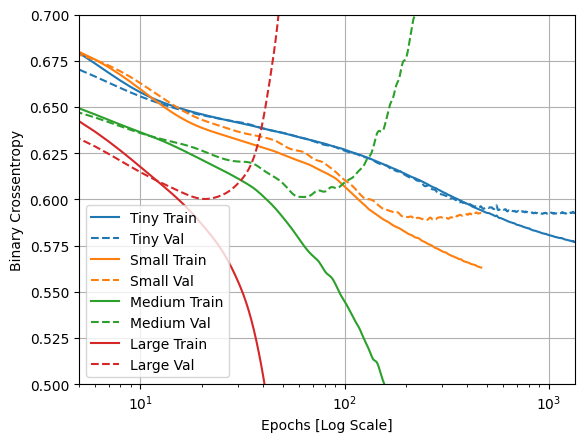

In [32]:
plotter.plot(size_histories)
a = plt.xscale('log')
plt.xlim([5, max(plt.xlim())])
plt.ylim([0.5, 0.7])
plt.xlabel("Epochs [Log Scale]")

참고: 위의 모든 훈련 실행은 모델이 개선되지 않는다는 것이 분명해지면 훈련을 종료하도록 `callbacks.EarlyStopping`을 사용했습니다.

### TensorBoard에서 보기

이러한 모델은 모두 훈련 중에 TensorBoard 로그를 작성했습니다.

노트북 내에 내장된 TensorBoard 뷰어를 엽니다.

In [33]:
#docs_infra: no_execute

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Open an embedded TensorBoard viewer
%tensorboard --logdir {logdir}/sizes

[TensorBoard.dev](https://tensorboard.dev/experiment/vW7jmmF9TmKmy3rbheMQpw/#scalars&_smoothingWeight=0.97)에서 이 노트북의 [이전 실행 결과](https://tensorboard.dev/)를 볼 수 있습니다.

TensorBoard.dev는 ML 실험을 호스팅 및 추적하고 모든 사람과 공유하기 위한 관리 환경입니다.

편의를 위해 `<iframe>`에도 포함시켰습니다.

In [34]:
display.IFrame(
    src="https://tensorboard.dev/experiment/vW7jmmF9TmKmy3rbheMQpw/#scalars&_smoothingWeight=0.97",
    width="100%", height="800px")

TensorBoard 결과를 공유하려면 다음을 코드 셀에 복사하여 [TensorBoard.dev](https://tensorboard.dev/)에 로그를 업로드할 수 있습니다.

참고: 이 단계에는 Google 계정이 필요합니다.

```
!tensorboard dev upload --logdir  {logdir}/sizes
```

주의: 이 명령은 종료되지 않으며, 장기 실험 결과를 지속적으로 업로드하도록 설계되었습니다. 데이터가 업로드되면 노트북 도구의 "실행 중단" 옵션을 사용하여 이를 중지해야 합니다.

## 과대적합을 방지하기 위한 전략

이 섹션의 내용을 시작하기 전에 위의 `"Tiny"` 모델에서 훈련 로그를 복사하여 비교 기준으로 사용합니다.

In [35]:
shutil.rmtree(logdir/'regularizers/Tiny', ignore_errors=True)
shutil.copytree(logdir/'sizes/Tiny', logdir/'regularizers/Tiny')

PosixPath('/var/folders/gj/skwjrjts6mdfv78jdlhh__5r0000gn/T/tmpyczz_v26/tensorboard_logs/regularizers/Tiny')

In [36]:
regularizer_histories = {}
regularizer_histories['Tiny'] = size_histories['Tiny']

### 가중치를 규제하기


아마도 오캄의 면도날(Occam's Razor) 이론을 들어 보았을 것입니다. 어떤 것을 설명하는 두 가지 방법이 있다면 더 정확한 설명은 최소한의 가정이 필요한 가장 "간단한" 설명일 것입니다. 이는 신경망으로 학습되는 모델에도 적용됩니다. 훈련 데이터와 네트워크 구조가 주어졌을 때 이 데이터를 설명할 수 있는 가중치의 조합(즉, 가능한 모델)은 많습니다. 간단한 모델은 복잡한 것보다 과대적합되는 경향이 작을 것입니다.

여기에서 "간단한 모델"은 매개변수 값의 분포가 엔트로피가 적은 모델(또는 위의 섹션에서 설명한 것처럼 매개변수가 모두 거의 없는 모델)입니다. 따라서 과대적합을 완화하는 일반적인 방법은 가중치가 작은 값만 사용하도록 하여 가중치 값의 분포를 보다 "정규화"하여 네트워크의 복잡성에 제약을 가하는 것입니다. 이것을 "가중치 정규화"라고 하며, 큰 가중치를 갖는 것과 관련된 비용을 네트워크의 손실 함수에 추가하는 방식으로 수행됩니다. 이 비용은 다음과 같이 두 가지 형태로 제공됩니다.

- [L1 규제](https://developers.google.com/machine-learning/glossary/#L1_regularization)는 가중치의 절댓값에 비례하는 비용이 추가됩니다(즉, 가중치의 "L1 노름(norm)"을 추가합니다).

- [L2 규제](https://developers.google.com/machine-learning/glossary/#L2_regularization)는 가중치의 제곱에 비례하는 비용이 추가됩니다(즉, 가중치의 "L2 노름"의 제곱을 추가합니다). 신경망에서는 L2 규제를 가중치 감쇠(weight decay)라고도 부릅니다. 이름이 다르지만 혼돈하지 마세요. 가중치 감쇠는 수학적으로 L2 규제와 동일합니다.

L1 정규화는 가중치를 정확히 0으로 푸시하여 희소 모델을 유도합니다. L2 정규화는 가중치 매개변수를 희소하게 만들지 않고 여기에 페널티를 부여하는데 이는 작은 가중치에 대해서는 페널티가 0이 되기 때문입니다(L2가 더 일반적인 이유 중 하나).

`tf.keras`에서는 가중치 정규화 인스턴스를 레이어에 키워드 인수로 전달함으로써 가중치 정규화가 추가됩니다. L2 가중치 정규화 추가:

In [37]:
l2_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

regularizer_histories['l2'] = compile_and_fit(l2_model, "regularizers/l2")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               14848     
                                                                 
 dense_15 (Dense)            (None, 512)               262656    
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dense_18 (Dense)            (None, 1)                 513       
                                                                 
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________


2023-03-04 22:17:31.976657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch: 0, accuracy:0.4995,  binary_crossentropy:0.7721,  loss:2.2745,  val_accuracy:0.5170,  val_binary_crossentropy:0.6731,  val_loss:2.0871,  
.

2023-03-04 22:17:32.647976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


...................................................................................................
Epoch: 100, accuracy:0.6511,  binary_crossentropy:0.6015,  loss:0.6245,  val_accuracy:0.5970,  val_binary_crossentropy:0.5966,  val_loss:0.6197,  
....................................................................................................
Epoch: 200, accuracy:0.6739,  binary_crossentropy:0.5856,  loss:0.6087,  val_accuracy:0.6750,  val_binary_crossentropy:0.5759,  val_loss:0.5991,  
....................................................................................................
Epoch: 300, accuracy:0.6879,  binary_crossentropy:0.5691,  loss:0.5939,  val_accuracy:0.6820,  val_binary_crossentropy:0.5737,  val_loss:0.5984,  
....................................................................................................
Epoch: 400, accuracy:0.6938,  binary_crossentropy:0.5610,  loss:0.5880,  val_accuracy:0.6990,  val_binary_crossentropy:0.5740,  val_loss:0.6011,  
.........

`l2(0.001)`는 네트워크의 전체 손실에 층에 있는 가중치 행렬의 모든 값이 `0.001 * weight_coefficient_value**2`만큼 더해진다는 의미입니다. 이런 페널티(penalty)는 훈련할 때만 추가됩니다. 따라서 테스트 단계보다 훈련 단계에서 네트워크 손실이 훨씬 더 클 것입니다.

이것이 바로 우리가 `binary_crossentropy`를 직접 모니터링하는 이유입니다. 이 정규화 구성 요소가 혼합되어 있지 않기 때문입니다.

따라서 `L2` 정규화 패널티가 있는 이 동일한 `"Large"` 모델의 성능이 훨씬 더 좋습니다.


(0.5, 0.7)

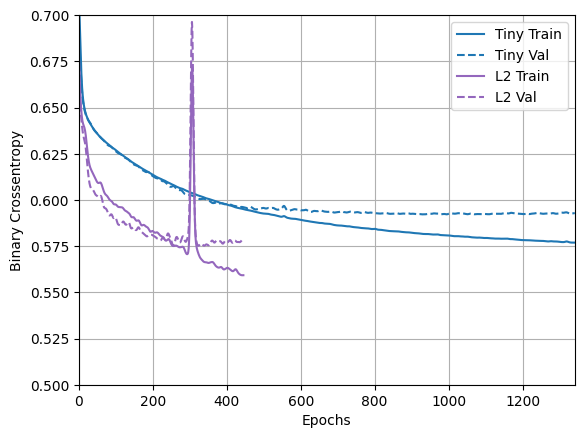

In [38]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

위의 다이어그램과 같이 `"L2"` 정규화 모델은 `"Tiny"` 모델에 비해 훨씬 더 경쟁력이 있습니다. 이 `"L2"` 모델은 동일한 수의 매개변수를 가지고 있음에도 기반을 두고 있는 `"Large"` 모델보다 과대적합에 훨씬 더 강합니다.

#### 더 많은 정보

다음과 같이 이러한 종류의 정규화에 대해 주목해야 할 두 가지 중요한 사항이 있습니다.

1. 자체 훈련 루프를 작성하는 경우 모델에 정규화 손실을 요청해야 합니다.

In [39]:
result = l2_model(features)
regularization_loss=tf.add_n(l2_model.losses)

1. 이 구현은 모델의 손실에 가중치 패널티를 추가한 다음 표준 최적화 절차를 적용하는 식으로 작동합니다.

대신에 원시 손실에 대해서만 옵티마이저를 실행한 다음 계산된 단계를 적용하는 동안 옵티마이저가 약간의 가중치 감소를 적용하는 두 번째 접근 방식이 있습니다. 이 "분리된 가중치 감소"는 `tf.keras.optimizers.Ftrl` 및 `tfa.optimizers.AdamW`와 같은 옵티마이저에서 사용됩니다.

### 드롭아웃 추가하기

드롭아웃은 신경망에 대해 가장 효과적이고 가장 일반적으로 사용되는 정규화 기술 중 하나로, 토론토 대학에서 Hinton과 그의 학생들이 개발했습니다.

드롭아웃을 직관적으로 설명하면, 네트워크의 개별 노드가 다른 노드의 출력에 의존할 수 없기 때문에 각 노드는 자체적으로 유용한 요소를 출력해야 한다는 것입니다.

레이어에 적용되는 드롭아웃은 훈련 중에 레이어의 여러 출력 요소를 무작위로 "드롭아웃"(즉, 0으로 설정)하는 식으로 작동합니다. 예를 들어 보통의 경우 주어진 레이어는 훈련 중 주어진 입력 샘플에 대해 벡터 `[0.2, 0.5, 1.3, 0.8, 1.1]`을 반환할 수 있습니다. 드롭아웃을 적용한 후 이 벡터에는 무작위로 분포된 몇 개의 0 항목이 있습니다(예: `[0, 0.5, 1.3, 0, 1.1]`).

"드롭아웃 비율"은 0이 되는 특성의 비율로, 일반적으로 0.2에서 0.5 사이로 설정됩니다. 테스트 시간에는 어떤 유닛도 드롭아웃되지 않고 대신 레이어의 출력 값이 드롭아웃 비율과 동일한 계수만큼 축소되는데, 이는 훈련 시간에 더 많은 유닛이 활성화된다는 사실과 균형을 맞추기 위해서입니다.

Keras에서 `tf.keras.layers.Dropout` 레이어를 통해 네트워크에 드롭아웃을 도입할 수 있습니다. 이 레이어는 직전 레이어의 출력에 적용됩니다.

네트워크에 두 개의 드롭아웃 레이어를 추가하여 과대적합을 줄이는 효과가 얼마나 되는지 확인해보겠습니다.

In [40]:
dropout_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1)
])

regularizer_histories['dropout'] = compile_and_fit(dropout_model, "regularizers/dropout")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 512)               14848     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 512)              

2023-03-04 22:59:06.781344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch: 0, accuracy:0.5085,  binary_crossentropy:0.8275,  loss:0.8275,  val_accuracy:0.4870,  val_binary_crossentropy:0.6771,  val_loss:0.6771,  
.

2023-03-04 22:59:07.391894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


...................................................................................................
Epoch: 100, accuracy:0.6668,  binary_crossentropy:0.5852,  loss:0.5852,  val_accuracy:0.6740,  val_binary_crossentropy:0.5732,  val_loss:0.5732,  
....................................................................................................
Epoch: 200, accuracy:0.7065,  binary_crossentropy:0.5363,  loss:0.5363,  val_accuracy:0.6810,  val_binary_crossentropy:0.5888,  val_loss:0.5888,  
.....................................................................................

(0.5, 0.7)

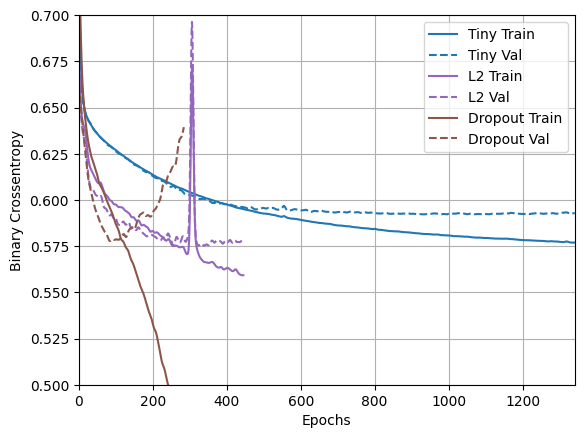

In [41]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

이 플롯으로부터 이러한 정규화 접근 방식 모두 `"Large"` 모델의 동작을 개선한다는 것이 분명합니다. 그러나 여전히 `"Tiny"` 기준을 넘어서지는 못합니다.

다음으로, 둘 다 함께 시도하고 더 나은지 확인합니다.

### L2 + 드롭아웃 결합

In [ ]:
combined_model = tf.keras.Sequential([
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1)
])

regularizer_histories['combined'] = compile_and_fit(combined_model, "regularizers/combined")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               14848     
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 512)               262656    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_27 (Dense)            (None, 512)              

2023-03-04 23:32:05.349427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch: 0, accuracy:0.5067,  binary_crossentropy:0.8291,  loss:0.9871,  val_accuracy:0.4900,  val_binary_crossentropy:0.6757,  val_loss:0.8329,  
.

2023-03-04 23:47:40.346591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


...................................................................................................
Epoch: 100, accuracy:0.6523,  binary_crossentropy:0.6023,  loss:0.6285,  val_accuracy:0.6590,  val_binary_crossentropy:0.5824,  val_loss:0.6084,  
....................................................................................................
Epoch: 200, accuracy:0.6781,  binary_crossentropy:0.5823,  loss:0.6064,  val_accuracy:0.6850,  val_binary_crossentropy:0.5693,  val_loss:0.5935,  
....................................................................................................
Epoch: 300, accuracy:0.6741,  binary_crossentropy:0.5745,  loss:0.6021,  val_accuracy:0.6840,  val_binary_crossentropy:0.5662,  val_loss:0.5939,  
....................................................................................................
Epoch: 400, accuracy:0.6915,  binary_crossentropy:0.5615,  loss:0.5917,  val_accuracy:0.6770,  val_binary_crossentropy:0.5711,  val_loss:0.6013,  
.........

In [ ]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

`"Combined"` 정규화가 있는 이 모델은 분명히 지금까지 최고의 모델입니다.

### TensorBoard에서 보기

이러한 모델은 TensorBoard 로그도 기록했습니다.

노트북 내에 내장된 Tensorboard 뷰어를 열려면 코드 셀에 다음 내용을 복사하세요.

```
%tensorboard --logdir {logdir}/regularizers
```

[TensorBoard.dev](https://tensorboard.dev/experiment/fGInKDo8TXes1z7HQku9mw/#scalars&_smoothingWeight=0.97)에서 이 노트북의 [이전 실행 결과](https://tensorboard.dev/)를 볼 수 있습니다.

편의를 위해 `<iframe>`에도 포함시켰습니다.

In [ ]:
display.IFrame(
    src="https://tensorboard.dev/experiment/fGInKDo8TXes1z7HQku9mw/#scalars&_smoothingWeight=0.97",
    width = "100%",
    height="800px")


다음과 함께 업로드되었습니다.

```
!tensorboard dev upload --logdir  {logdir}/regularizers
```

## 결론

요약하자면 신경망에서 과대적합을 방지하는 가장 일반적인 방법은 다음과 같습니다.

- 더 많은 훈련 데이터를 얻음
- 네트워크 용량을 줄임
- 가중치 정규화를 추가함
- 드롭아웃을 추가함

이 가이드에서 다루지 않는 두 가지 중요한 접근 방식은 다음과 같습니다.

- 데이터 증강
- 배치 정규화(`tf.keras.layers.BatchNormalization`)

각 방법은 그 자체로 도움이 될 수 있지만 이를 결합하여 더 큰 효과를 거둘 수 있는 경우가 종종 있다는 점을 기억하기 바랍니다.